In [1]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
import sys
import pynpoint as pp
from glob import glob
import pathlib

In [2]:
sys.path.append('/home/ipa/quanz/user_accounts/jhayoz/Projects/archival_SINFONI/SINFONI_pipeline/Pynpoint_ifs')

In [3]:
import background_files as core

In [4]:
pixscale=25e-3 # arcsec

In [5]:
# Define Directories
working_place_in = '/scratch/jhayoz/archival_sinfoni/BetaPicb/'
root_dir = '/home/ipa/quanz/user_accounts/jhayoz/Projects/archival_SINFONI/'
input_place_in   = root_dir + 'BetaPicb/'
output_place_in  = root_dir + 'BetaPicb/products'

In [10]:
files_offset = glob(input_place_in + 'archive_eso_products/reflex_end_products/2023-08-09T15:10:01/*/*OBS_OBJ*')
files_onstar = glob(input_place_in + 'archive_eso_products/reflex_end_products/2023-08-09T16:15:11/*/*OBS_OBJ*')

In [11]:
files_onstar

['/home/ipa/quanz/user_accounts/jhayoz/Projects/archival_SINFONI/BetaPicb/archive_eso_products/reflex_end_products/2023-08-09T16:15:11/SINFO.2014-09-11T07:31:48.394_tpl/Beta-Pic-K_2nd-night_OBS_OBJ.fits',
 '/home/ipa/quanz/user_accounts/jhayoz/Projects/archival_SINFONI/BetaPicb/archive_eso_products/reflex_end_products/2023-08-09T16:15:11/SINFO.2014-09-11T07:35:37.624_tpl/Beta-Pic-K_2nd-night_OBS_OBJ.fits',
 '/home/ipa/quanz/user_accounts/jhayoz/Projects/archival_SINFONI/BetaPicb/archive_eso_products/reflex_end_products/2023-08-09T16:15:11/SINFO.2014-09-11T07:35:37.624_tpl/Beta-Pic-K_2nd-night_OBS_OBJ_1.fits',
 '/home/ipa/quanz/user_accounts/jhayoz/Projects/archival_SINFONI/BetaPicb/archive_eso_products/reflex_end_products/2023-08-09T16:15:11/SINFO.2014-09-11T07:35:37.624_tpl/Beta-Pic-K_2nd-night_OBS_OBJ_2.fits',
 '/home/ipa/quanz/user_accounts/jhayoz/Projects/archival_SINFONI/BetaPicb/archive_eso_products/reflex_end_products/2023-08-09T16:15:11/SINFO.2014-09-11T07:53:54.857_tpl/Beta-Pi

In [12]:
dirs_offset = list(dict.fromkeys([pathlib.Path(files_offset[k]).parent for k in range(len(files_offset))]))
dirs_onstar = list(dict.fromkeys([pathlib.Path(files_onstar[k]).parent for k in range(len(files_onstar))]))

In [13]:
dirs_onstar[0].as_posix()

'/home/ipa/quanz/user_accounts/jhayoz/Projects/archival_SINFONI/BetaPicb/archive_eso_products/reflex_end_products/2023-08-09T16:15:11/SINFO.2014-09-11T07:31:48.394_tpl'

In [14]:
pipeline = pp.Pypeline(
    working_place_in = working_place_in, 
    input_place_in   = input_place_in, 
    output_place_in  = output_place_in)

PynPoint v0.10.0

Working place: /scratch/jhayoz/archival_sinfoni/BetaPicb/
Input place: /home/ipa/quanz/user_accounts/jhayoz/Projects/archival_SINFONI/BetaPicb/
Output place: /home/ipa/quanz/user_accounts/jhayoz/Projects/archival_SINFONI/BetaPicb/products

Database: /scratch/jhayoz/archival_sinfoni/BetaPicb/PynPoint_database.hdf5
Configuration: /scratch/jhayoz/archival_sinfoni/BetaPicb/PynPoint_config.ini

Number of CPUs: 20
Number of threads: not set


# Read raw data

In [ ]:
len(files_onstar)

In [ ]:
68758/31

In [80]:
module = pp.FitsReadingModule(
    name_in = 'read_raw_onstar',
    filenames = files_onstar,
    image_tag = 'raw_onstar',
    check=True)
pipeline.add_module(module)
pipeline.run_module('read_raw_onstar')


-----------------
FitsReadingModule
-----------------

Module name: read_raw_onstar
Reading FITS files... [DONE]                      
Output ports: raw_onstar (68758, 64, 64), fits_header/Beta-Pic-K_2nd-night_OBS_OBJ.fits (752,), fits_header/Beta-Pic-K_2nd-night_OBS_OBJ_1.fits (752,), fits_header/Beta-Pic-K_2nd-night_OBS_OBJ_2.fits (752,), fits_header/Beta-Pic-K_2nd-night_OBS_OBJ_10.fits (752,), fits_header/Beta-Pic-K_2nd-night_OBS_OBJ_11.fits (752,), fits_header/Beta-Pic-K_2nd-night_OBS_OBJ_12.fits (752,), fits_header/Beta-Pic-K_2nd-night_OBS_OBJ_13.fits (752,), fits_header/Beta-Pic-K_2nd-night_OBS_OBJ_14.fits (752,), fits_header/Beta-Pic-K_2nd-night_OBS_OBJ_15.fits (752,), fits_header/Beta-Pic-K_2nd-night_OBS_OBJ_16.fits (752,), fits_header/Beta-Pic-K_2nd-night_OBS_OBJ_17.fits (752,), fits_header/Beta-Pic-K_2nd-night_OBS_OBJ_18.fits (752,), fits_header/Beta-Pic-K_2nd-night_OBS_OBJ_19.fits (752,), fits_header/Beta-Pic-K_2nd-night_OBS_OBJ_20.fits (752,), fits_header/Beta-Pic-K_2nd-ni

In [85]:
data = pipeline.get_data('raw_onstar',data_range=(0,2218))

In [86]:
np.shape(data)

(2218, 64, 64)

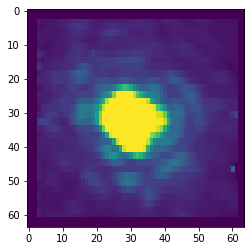

In [87]:
data_non_nan = data[100:-100,2:-2,1:-1 ]
img = np.nanmean(data[1200:1550,:,:],axis=0)
plt.figure()
plt.imshow(img,vmin=np.nanpercentile(img,5),vmax=np.nanpercentile(img,95))
plt.show()

# Remove NaNs

In [21]:
from background_files.ifuframeselection import SelectWavelengthRangeModule
from background_files.ifubadpixel import NanFilterModule
from background_files.ifucentering import IFUAlignCubesModule
from background_files.ifupsfpreparation import IFUStellarSpectrumModule
from background_files.ifupsfsubtraction import IFUPSFSubtractionModule
from background_files.ifuresizing import FoldingModule
from background_files.ifustacksubset import CrossCorrelationPreparationModule
from background_files.ifucrosscorrelation import CrossCorrelationModule
from background_files.ifupcasubtraction import IFUResidualsPCAModule
from background_files.ifuresizing import UnfoldingModule

/home/ipa/quanz/user_accounts/jhayoz/Projects/archival_SINFONI/SINFONI_pipeline/Pynpoint_ifs/background_files/ifucentering.py:10: DeprecationWarning: Please use `generic_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import generic_filter


In [17]:
module = SelectWavelengthRangeModule(
    name_in = 'select_range',
    image_in_tag = 'raw_onstar',
    image_out_tag = 'raw_onstar_spectrum_sel',
    wv_out_tag = 'wavelength_range',
    range_f = (2.088, 2.452))
pipeline.add_module(module)
pipeline.run_module('select_range')


---------------------------
SelectWavelengthRangeModule
---------------------------

Module name: select_range
Input port: raw_onstar (68758, 64, 64)
SelectWavelengthRangeModule... [DONE]                      
Output ports: raw_onstar_spectrum_sel (46035, 64, 64), wavelength_range (1485,)


In [32]:
wvl = pipeline.get_data('wavelength_range')

In [33]:
wvl

array([2.08803647, 2.08828147, 2.08852647, ..., 2.45112981, 2.45137481,
       2.45161982])

In [22]:
module = NanFilterModule(
    name_in = "substitute_nans",
    image_in_tag = "raw_onstar_spectrum_sel",
    image_out_tag = "raw_onstar_spectrum_sel_nancorr",
    local=True
    )
pipeline.add_module(module)
pipeline.run_module('substitute_nans')


---------------
NanFilterModule
---------------

Module name: substitute_nans
Input port: raw_onstar_spectrum_sel (46035, 64, 64)
hey
Running NanFilterModule..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [24]:
module = pp.RemoveLinesModule(
    lines = (4,4,4,4),
    name_in = "enlarge_image",
    image_in_tag = "raw_onstar_spectrum_sel_nancorr",
    image_out_tag = "raw_onstar_spectrum_sel_nancorr_small")

pipeline.add_module(module)
pipeline.run_module("enlarge_image")


-----------------
RemoveLinesModule
-----------------

Module name: enlarge_image
Input port: raw_onstar_spectrum_sel_nancorr (46035, 64, 64)
Removing lines... [DONE]                      
Output port: raw_onstar_spectrum_sel_nancorr_small (46035, 56, 56)


In [25]:
data = pipeline.get_data("raw_onstar_spectrum_sel_nancorr_small")

In [36]:
np.shape(data)

(46035, 56, 56)

In [37]:
46035/1485

31.0

In [ ]:
data.reshape((int(46035/1485),np.shape(data)[1]))

In [45]:
def select_cubes(data,wavelength):
    length_cube = len(wavelength)
    shape_cube = np.shape(data)
    return data.reshape((int(shape_cube[0]/length_cube),length_cube,shape_cube[1],shape_cube[2]))

In [47]:
datacubes = select_cubes(data,wvl)

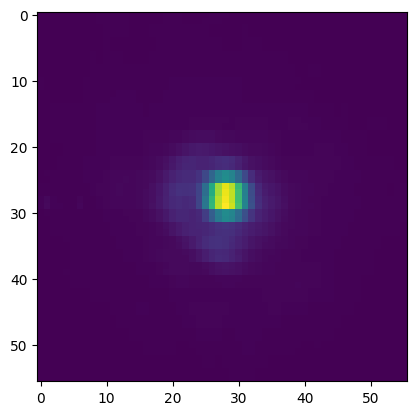

In [54]:
plt.figure()
plt.imshow(np.mean(datacubes[:2],axis=(0,1)))
plt.show()

In [65]:
data = pipeline.get_data('raw_onstar_spectrum_sel_nancorr_small')

In [66]:
datacubes = select_cubes(data,wvl)

In [67]:
np.shape(datacubes)

(31, 1485, 56, 56)

In [69]:
mean_spec = np.mean(datacubes,axis=(0,2,3))

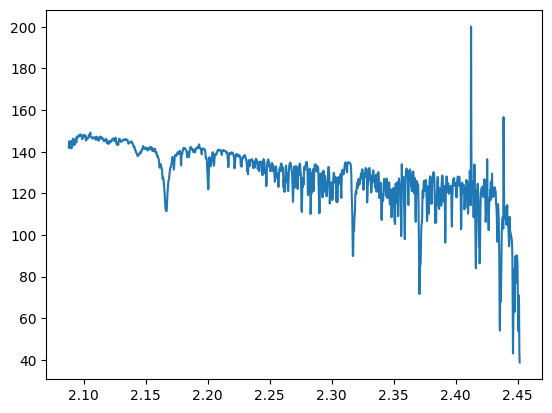

In [70]:
plt.plot(wvl,mean_spec)

In [56]:
# pynpoint
module = pp.FitCenterModule(name_in = "centering_all",
                                image_in_tag = "raw_onstar_spectrum_sel_nancorr_small",
                                method='full',
                                fit_out_tag='raw_onstar_spectrum_sel_nancorr_small_ctr',
                                radius = 1.0)

pipeline.add_module(module)
pipeline.run_module("centering_all")


---------------
FitCenterModule
---------------

Module name: centering_all
Input port: raw_onstar_spectrum_sel_nancorr_small (46035, 56, 56)
Fitting the stellar PSF

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/processing/centering.py:245: DeprecationWarning: The 'radius' parameter has been deprecated. Please use the 'mask_radii' parameter instead. The argument of 'mask_radii' is set to (None, 1.0).
  warnings.warn(f'The \'radius\' parameter has been deprecated. Please use the '
/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:315: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


....................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 31.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


.

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 35.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


...

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:315: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 9.
  warnings.warn(f'Fit could not converge on image number {im_index}.')
/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 16.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


....................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:315: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


..............

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 1.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


.....

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:315: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


.....

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 44.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


....................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:315: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


..

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 29.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


..........

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 36.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


.....................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 14.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


......

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:315: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


.....................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 6.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


..........

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 49.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


.....................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:315: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


....

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


.......................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 19.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


...............

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:315: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


............

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 4.
  warnings.warn(f'Fit could not converge on image number {im_index}.')
/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


...........

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:315: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


...

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


........................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


.....

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 26.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


.

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


.......................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


..

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 31.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


....................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 9.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


..

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 16.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


.................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:315: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


..................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:315: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


..

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


.........................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 29.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


..........

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


....................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 14.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


..........................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


........................................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 34.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


..

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


....

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 41.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


...........

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


.

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


..

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 18.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


.

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 19.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


.................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:315: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


.......................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:315: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


..........................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


..

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 39.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


......

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 46.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


...................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 24.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


..............................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 16.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


.....................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 1.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


...........................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


..............

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 29.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


.....................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 14.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


...

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 21.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


...........................................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 49.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


........................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 34.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


....

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 41.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


..........................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 26.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


.................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 4.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


......

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 11.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


..............................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:315: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


.........

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 39.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


........................

/home/ipa/quanz/user_accounts/jhayoz/Projects/ENV_IFS_PP/PynPoint/pynpoint/util/apply_func.py:326: UserWarning: Fit could not converge on image number 24.
  warnings.warn(f'Fit could not converge on image number {im_index}.')


.......... [DONE]
Output port: raw_onstar_spectrum_sel_nancorr_small_ctr (46035, 14)


In [57]:
data = pipeline.get_data('raw_onstar_spectrum_sel_nancorr_small_ctr')

In [59]:
np.shape(data)

(46035, 14)

In [60]:
psf_pos = np.vstack([data[:,0],data[:,2]])

In [61]:
np.shape(psf_pos)

(2, 46035)

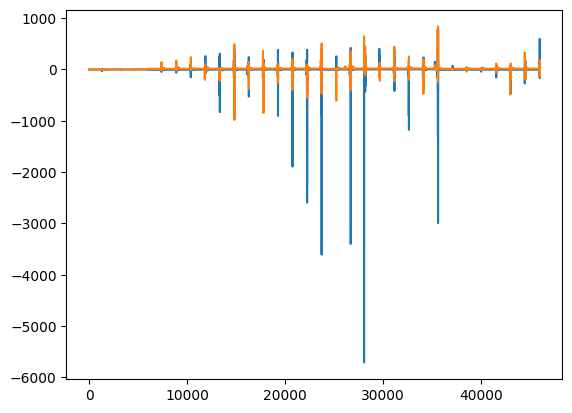

In [64]:
plt.plot(psf_pos[0])
plt.plot(psf_pos[1])

In [ ]:
# pynpoint
Coadd_cubes = StackCubesModule(name_in= "Coadd_cubes",
                             image_in_tag = "spectrum_NaN_small",
                             image_out_tag = "coadded_cubes",
                             combine='median')



pipeline.add_module(Coadd_cubes)
pipeline.run_module("Coadd_cubes")
pipeline.get_data("coadded_cubes")

In [ ]:
Centering_cubes = FitCenterModule(name_in = "Centering_cubes",
                                image_in_tag = "coadded_cubes",
                                method='full',
                                fit_out_tag='centering_cubes',
                                radius = 1.0)

In [ ]:
Shift_no_center = IFUAlignCubesModule(precision=0.02,
                                      shift_all_in_tag= "centering_all",
                                       shift_cube_in_tag = "centering_cubes",
                                       interpolation="spline",
                                       name_in="shift_no_center",
                                       image_in_tag="spectrum_NaN_small",
                                       image_out_tag="cubes_aligned")
pipeline.add_module(Shift_no_center)
pipeline.run_module("shift_no_center")

In [ ]:
Centering_test = FitCenterModule(name_in = "Centering_test",
                                  image_in_tag = "cubes_aligned",
                                  method='full',
                                  fit_out_tag='centering_test',
                                  radius = 1.0,
                                  guess=(0.5,0.2,3.,3.,5000,0.,0.))

pipeline.add_module(Centering_test)
pipeline.run_module("Centering_test")
pipeline.get_data("centering_test")

In [ ]:
# pynpoint
bp = BadPixelSigmaFilterModule(name_in='bp',
                               image_in_tag="cubes_aligned",
                               image_out_tag="cubes_bp",
                               map_out_tag=None,
                               box=9,
                               sigma=3.,
                               iterate=4)

pipeline.add_module(bp)
pipeline.run_module('bp')
pipeline.get_data("cubes_bp")

In [ ]:
star_master = IFUStellarSpectrumModule(name_in="star_master",
                                       image_in_tag="cubes_aligned",
                                       wv_in_tag = "wavelength_range",
                                       spectrum_out_tag="stellar_spectrum",
                                       num_pix = 10,
                                       std_max = 0.1)
pipeline.add_module(star_master)
pipeline.run_module("star_master")
pipeline.get_data("stellar_spectrum")

In [ ]:
## bugs here!!!
master_sub = IFUPSFSubtractionModule(name_in = "master_sub",
                                     image_in_tag="cubes_aligned",
                                     #stellar_spectra_in_tag = "stellar_spectrum",
                                     image_out_tag = "PSF_sub",
                                     #gauss_sigma=10,
                                     sigma=2.,
                                     #iteration = 2
                                     )

pipeline.add_module(master_sub)
pipeline.run_module("master_sub")
pipeline.get_data("PSF_sub")

In [ ]:
# pynpoint
parang = ParangReadingModule(file_name = 'parang.txt',
                             name_in = "parang",
                             input_dir= "/home/ipa/quanz/user_accounts/egarvin/IFS_pipeline/30_data/betapic/sinfoni_Kband/auxiliaries",
                             #input_dir = '/Users/Gabo/SINFONI/Beta_Pic/Results/',
                             data_tag = "PSF_sub")

pipeline.add_module(parang)
pipeline.run_module("parang")
pipeline.get_data("PSF_sub")

In [ ]:
Folding = FoldingModule(name_in="Folding",
                        image_in_tag="PSF_sub",
                        image_out_tag = "im_2D")

pipeline.add_module(Folding)
pipeline.run_module("Folding")
pipeline.get_data("im_2D") # next bug is here.

In [ ]:
PCA = IFUResidualsPCAModule(pc_number = 3,
                            name_in="PCA",
                            image_in_tag="im_2D",
                            image_out_tag = "im_2D_PCA")

In [ ]:

Unfolding = UnfoldingModule(name_in="Unfolding",
                        image_in_tag="im_2D",
                        image_out_tag = "3D_PCA")

In [ ]:
# pynpoint
Large_image = AddLinesModule(lines = (20,20,20,20),
                                name_in = "Large_image",
                                image_in_tag = "3D_PCA",
                                image_out_tag = "3D_PCA_large")

In [ ]:

CC_prep = CrossCorrelationPreparationModule(name_in="CC_prep",
                                            image_in_tag="3D_PCA_large",
                                            shift_cubes_in_tag="centering_cubes",
                                            image_out_tag="CC_prep",
                                            mask_out_tag="mask",
                                            data_mask_out_tag = "data_mask")

In [ ]:
CrossCorr = CrossCorrelationModule(name_in = "CrossCorr",
                                   RV = 2500,
                                   dRV = 10,
                                   data_wv_in_tag = "wavelength_range",
                                   model_wv = wv_data,
                                   model_abs = H2O_residuals_LR,
                                   image_in_tag = "data_mask",
                                   mask_in_tag = "mask",
                                   snr_map_out_tag = "snr",
                                   CC_cube_out_tag = "CC_cube"
                                   )